# import the libraries

In [1]:
import numpy as np
import pandas as pd

# Load the dataset

In [3]:
df=pd.read_csv('Mall_customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### check the missing values

In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#### Exploratory Data Analysis (EDA)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [11]:
# select the relevant features of clustering
x=df.iloc[:,[3,4]].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

## # Standardize the features

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler=StandardScaler()

In [15]:
scaler

StandardScaler()

In [16]:
x_scaled=scaler.fit_transform(x)

In [17]:
x_scaled

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

## K-Means Clustering

In [22]:
# Finding optimal number of clusters using Elbow Method
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=42)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

C:\Users\91805\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\91805\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\91805\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\91805\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

## Plot the elbow graph

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

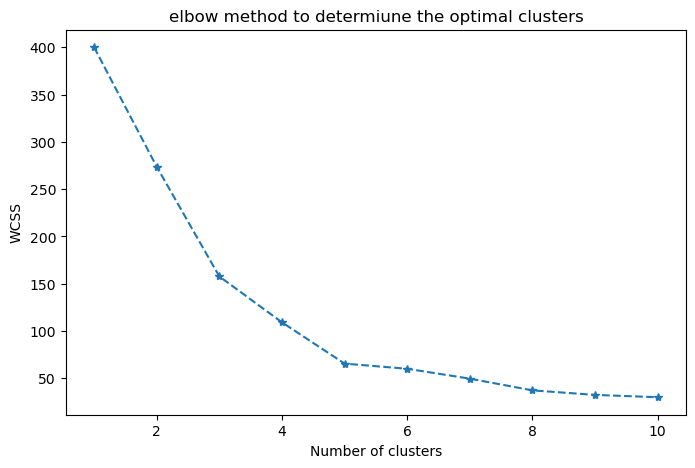

In [26]:
plt.figure(figsize=(8,5))
plt.plot(range(1,11),wcss,marker='*',linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('elbow method to determiune the optimal clusters')
plt.show()

In [29]:
# for example applying the k-means with optimal clusters
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(x_scaled)

C:\Users\91805\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


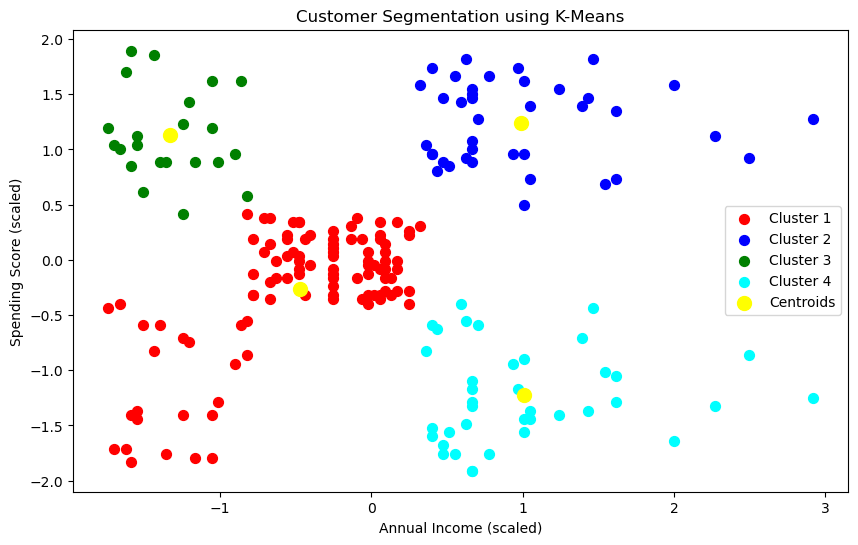

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(x_scaled[y_kmeans == 0, 0], x_scaled[y_kmeans == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(x_scaled[y_kmeans == 1, 0], x_scaled[y_kmeans == 1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(x_scaled[y_kmeans == 2, 0], x_scaled[y_kmeans == 2, 1], s=50, c='green', label='Cluster 3')
plt.scatter(x_scaled[y_kmeans == 3, 0], x_scaled[y_kmeans == 3, 1], s=50, c='cyan', label='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow', label='Centroids')
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.title("Customer Segmentation using K-Means")
plt.legend()
plt.show()
